In [21]:
import pandas as pd
d=pd.read_csv("/content/spam.csv")


In [22]:
d

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
d.shape

(5572, 2)

In [14]:
# prompt: count value of message

d['Message'].value_counts()


Message
Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Ok.                                                                                                                                                          4
                                                                                                                                                            ..
I gotta collect da car at 6 lei.      

In [15]:
d['Category'].value_counts()


Category
0    4825
1     747
Name: count, dtype: int64

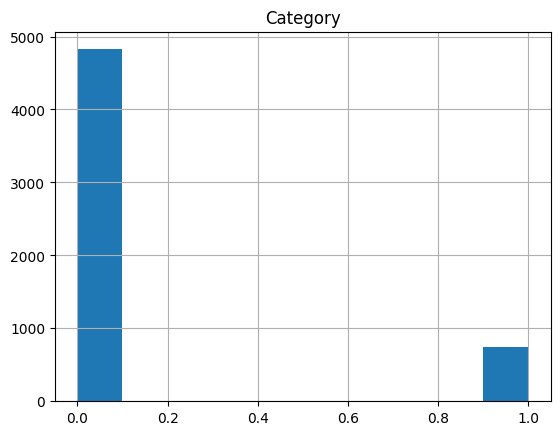

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_fi

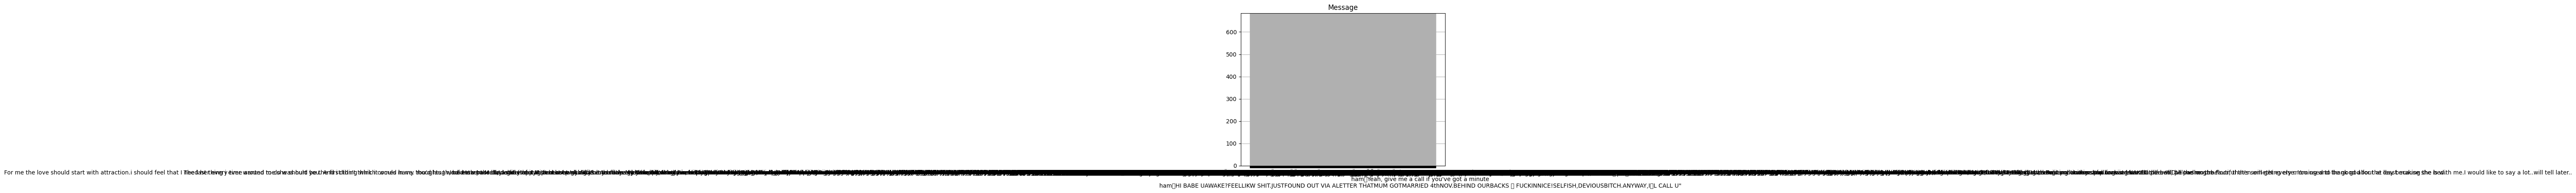

In [12]:
import matplotlib.pyplot as plt


features = list(d.columns)[:56]


for i, feature in enumerate(features):
  plt.figure(i)
  d[feature].hist()
  plt.title(feature)
  plt.show()


In [2]:
d["Category"].value_counts()


Category
ham     4825
spam     747
Name: count, dtype: int64

In [3]:
# prompt: want to assign category into  numeric formham=0 and spam =1

d['Category'] = d['Category'].replace({'ham':0, 'spam':1})


In [4]:
d

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


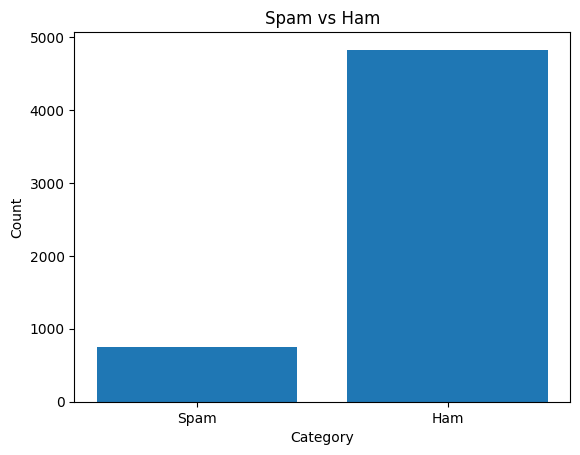

In [10]:
# prompt: now show graph spam or ham

import matplotlib.pyplot as plt

# Count the number of spam and ham messages
spam_count = d['Category'].value_counts()[1]
ham_count = d['Category'].value_counts()[0]

# Create a bar chart
plt.bar(['Spam', 'Ham'], [spam_count, ham_count])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Spam vs Ham')
plt.show()


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
tfidf_matrix = tfidf_vectorizer.fit_transform(d['Message'])
tfidf_matrix.shape


(5572, 2000)

In [6]:
d

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, d['Category'], test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(4457, 2000) (1115, 2000) (4457,) (1115,)


In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Accuracy of Logistic Regression:", accuracy_lr)


Accuracy of Logistic Regression: 0.9757847533632287


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy of KNN:", accuracy_knn)


Accuracy of KNN: 0.9291479820627803


In [17]:
# prompt: now train random forest and give accuracy

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy of Random Forest:", accuracy_rf)


Accuracy of Random Forest: 0.9856502242152466


In [18]:
# prompt: now train nayes bayes and give accuracy

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Accuracy of Naive Bayes:", accuracy_nb)


Accuracy of Naive Bayes: 0.9847533632286996


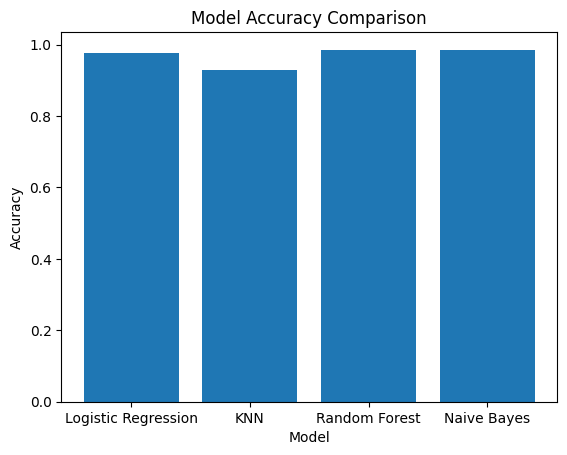

In [20]:
import matplotlib.pyplot as plt

# Create a list of model names and corresponding accuracies
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'Naive Bayes']
accuracies = [accuracy_lr, accuracy_knn, accuracy_rf, accuracy_nb]

# Create a bar chart
plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


In [19]:
 import pickle

# Save the trained model
pickle.dump(lr, open("model.sav", "wb"))

# Load the saved model
loaded_model = pickle.load(open("model.sav", "rb"))

# Create a function to get user input and predict
def predict_spam(message):
  message_tfidf = tfidf_vectorizer.transform([message])
  prediction = loaded_model.predict(message_tfidf)[0]
  if prediction == 0:
    print("This message is classified as 'ham'.")
  else:
    print("This message is classified as 'spam'.")

# Get user input
message = input("Enter a message: ")

# Predict and show the result
predict_spam(message)


Enter a message: ok
This message is classified as 'ham'.
